# Chapter 3. Drivers behind marketing engagement

Successful marketing campaigns will draw a lot of engagement from your customers, while ineffective marketing campaigns will not only drive a lower amount of engagement from your customers, but will also negatively impact your business. Customers might mark emails from your business as spam or unsubscribe from your mailing list.

## 3.1 Using regression analysis for explanatory analysis

### Explanatory analysis and regression analysis

With explanatory analysis, you can analyze and understand the key factors that are highly and significantly correlated with the outcomes that you want.

Regression analysis and regression models are frequently used to model the relationships between the attributes and the outcomes. Simply put, regression analysis estimates the values of output variables by finding a function of the attributes or features that best approximates the output values

### Logistic regression

Logistic regression is a type of regression analysis that is used when the output variable is binary (one for a positive outcome versus zero for a negative outcome).

## 3.2 Regression analysis with Python

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
profile = ProfileReport(df)

In [7]:
profile.to_widgets()

### Data analysis and visualization

In [8]:
df['Engaged'] = df['Response'].apply(lambda x: 0 if x == 'No' else 1)
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


#### Engagement rate

The percentage of customers that responded to the marketing calls

In [9]:
engagement_rate_df = pd.DataFrame(
    df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0
)
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [12]:
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


In [11]:
df.Engaged.value_counts()

0    7826
1    1308
Name: Engaged, dtype: int64

#### Sales channels

In [14]:
engagement_by_sales_channel_df = pd.pivot_table(
    df, values = 'Response', index = 'Sales Channel', columns = 'Engaged', aggfunc = len
).fillna(0)
engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa25b1fc550>,
      dtype=object)

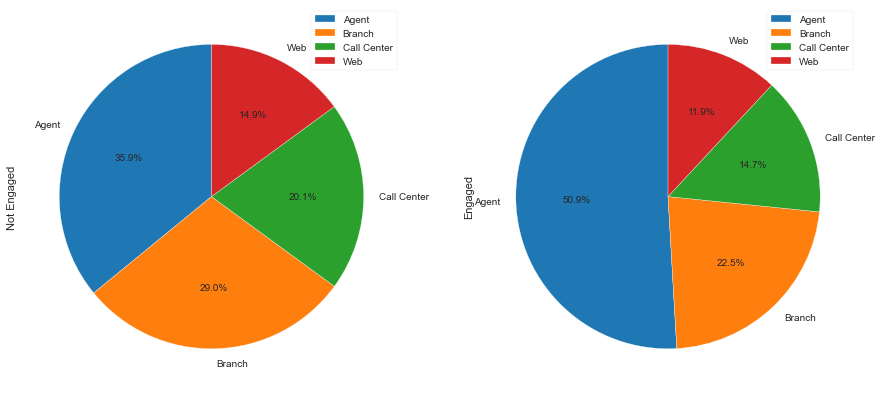

In [15]:
engagement_by_sales_channel_df.plot(
    kind = 'pie',
    figsize = (15, 7),
    startangle = 90,
    subplots = True, 
    autopct = lambda x: '%0.1f%%' % x
)

#### Total claim amounts

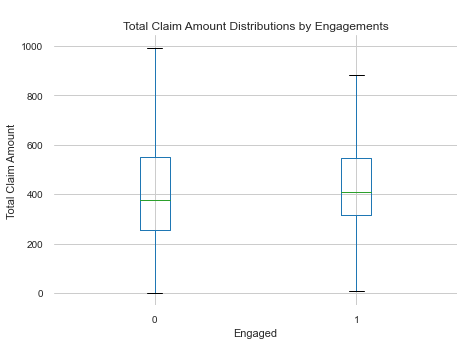

In [18]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by = 'Engaged',
    showfliers = False,
    figsize = (7,5)
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle(" ")
plt.show()

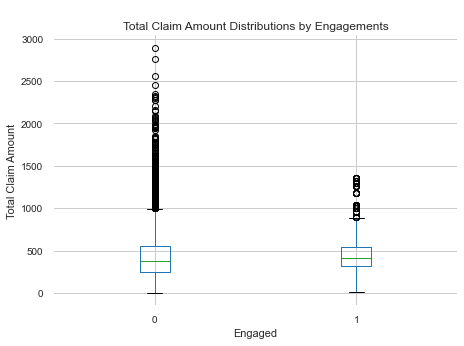

In [19]:
ax = df[['Engaged', 'Total Claim Amount']].boxplot(
    by = 'Engaged',
    showfliers = True,
    figsize = (7,5)
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle(" ")
plt.show()

### Regression analysis

#### Continuous variables

In [21]:
df['Income'].dtype

dtype('int64')

In [22]:
df['Customer Lifetime Value'].dtype

dtype('float64')

In [23]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [31]:
continuous_vars = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies',
    'Total Claim Amount'
]

In [35]:
import statsmodels.api as sm

logit = sm.Logit(
    df['Engaged'], 
    df[continuous_vars]
)
logit

In [37]:
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Sat, 20 Jun 2020   Pseudo R-squ.:                -0.02546
Time:                        20:59:29   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

#### Categorical variables

In [38]:
gender_values, gender_labels = df['Gender'].factorize()
print(gender_values)
print(gender_labels)

[0 0 0 ... 1 1 1]
Index(['F', 'M'], dtype='object')


In [39]:
categories = pd.Categorical(
    df['Education'],
    categories = ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)
categories

[Bachelor, Bachelor, Bachelor, Bachelor, Bachelor, ..., Bachelor, College, Bachelor, College, College]
Length: 9134
Categories (5, object): [High School or Below, Bachelor, College, Master, Doctor]

In [40]:
df['GenderFactorized'] = gender_values
df['EducationFactorized'] = categories.codes

In [41]:
logit = sm.Logit(
    df['Engaged'],
    df[['GenderFactorized', 'EducationFactorized']]
)
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Jun 2020   Pseudo R-squ.:                 -0.2005
Time:                        21:08:18   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

#### Combining continuous and categorical variables

In [42]:
logit = sm.Logit(
    df['Engaged'],
    df[['Customer Lifetime Value',
        'Income',
        'Monthly Premium Auto',
        'Months Since Last Claim',
        'Months Since Policy Inception',
        'Number of Open Complaints',
        'Number of Policies',
        'Total Claim Amount',
        'GenderFactorized',
        'EducationFactorized'
]]
)
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Sat, 20 Jun 2020   Pseudo R-squ.:                -0.02454
Time:                        21:11:01   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""

In [49]:
df.loc[:,['Gender','GenderFactorized','Education','EducationFactorized']].head(10)

,Gender,GenderFactorized,Education,EducationFactorized
0,F,0,Bachelor,1
1,F,0,Bachelor,1
2,F,0,Bachelor,1
3,M,1,Bachelor,1
4,M,1,Bachelor,1
5,F,0,Bachelor,1
6,F,0,College,2
7,M,1,Master,3
8,M,1,Bachelor,1
9,F,0,College,2


## 3.3 Regression analysis with R